In [1]:
from tensorly.metrics.regression import RMSE
from tensorly.decomposition import parafac
import time
import scipy.io
import tensorly as tl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorly.cp_tensor import CPTensor
from parafac_normalization_comparison import *

#parameters
init='svd'
svd='numpy_svd'
rank=10

#hyperspectral image
mat = scipy.io.loadmat('/home/ctuna/tensoptly/benchmark_data/Hyperspectral/Indian_pines_corrected.mat')
image=mat['indian_pines_corrected']

tensor=tl.tensor(image,dtype='float')

1. Method from PR
2. Inner loop normalization with last factor normalization after inner loop
3. Normalization at the end
4. 2 and 3 together
5. Current tensorly normalization

In [2]:
#normalized improved parafac result
tic = time.time()
tensornorm1, errorsnorm1 = parafac_normalize_1(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
weightsnorm1, factorsnorm1 = tensornorm1
cp_reconstructionnorm1 = tl.cp_to_tensor((weightsnorm1, factorsnorm1))
time_cp1 = time.time()-tic


#normalized improved parafac result
tic = time.time()
tensornorm2, errorsnorm2 = parafac_normalize_2(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
weightsnorm2, factorsnorm2 = tensornorm2
cp_reconstructionnorm2 = tl.cp_to_tensor((weightsnorm2, factorsnorm2))
time_cp2 = time.time()-tic


#normalized improved parafac result
tic = time.time()
tensornorm3, errorsnorm3 = parafac_normalize_3(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
weightsnorm3, factorsnorm3 = tensornorm3
cp_reconstructionnorm3 = tl.cp_to_tensor((weightsnorm3, factorsnorm3))
time_cp3 = time.time()-tic


#normalized improved parafac result
tic = time.time()
tensornorm4, errorsnorm4 = parafac_normalize_4(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
weightsnorm4, factorsnorm4 = tensornorm4
cp_reconstructionnorm4 = tl.cp_to_tensor((weightsnorm4, factorsnorm4))
time_cp4 = time.time()-tic


#normalized improved parafac result
tic = time.time()
tensornorm5, errorsnorm5 = parafac(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
weightsnorm5, factorsnorm5 = tensornorm5
cp_reconstructionnorm5 = tl.cp_to_tensor((weightsnorm5, factorsnorm5))
time_cp5 = time.time()-tic

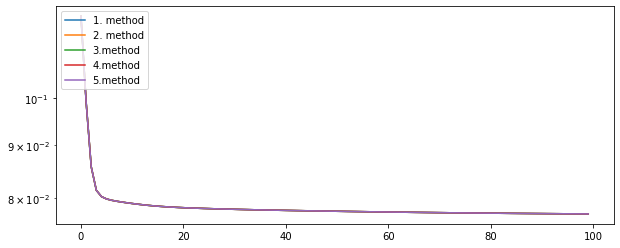

In [3]:
each_iteration(errorsnorm1, errorsnorm2, errorsnorm3, errorsnorm4, errorsnorm5)

In [4]:
print(weightsnorm1[:5])
print(weightsnorm2[:5])
print(weightsnorm3[:5])
print(weightsnorm4[:5])
print(weightsnorm5[:5])

[6316737.7031359   867239.70610176  505517.43297936  507516.0535534
  443708.99404261]
[6316737.70313704  867239.70610089  505517.43298062  507516.05355242
  443708.99404337]
[6316737.70313473  867239.70610081  505517.43298027  507516.05355533
  443708.99404313]
[6316737.70313473  867239.70610027  505517.43298098  507516.05355568
  443708.99404389]
[6316737.70313331  867239.70610082  505517.43298023  507516.05355739
  443708.99404366]


In [5]:
print(tl.mean(factorsnorm1[0]), tl.mean(factorsnorm1[1]), tl.mean(factorsnorm1[2]))
print(tl.mean(factorsnorm2[0]), tl.mean(factorsnorm2[1]), tl.mean(factorsnorm2[2]))
print(tl.mean(factorsnorm3[0]), tl.mean(factorsnorm3[1]), tl.mean(factorsnorm3[2]))
print(tl.mean(factorsnorm4[0]), tl.mean(factorsnorm4[1]), tl.mean(factorsnorm4[2]))
print(tl.mean(factorsnorm5[0]), tl.mean(factorsnorm5[1]), tl.mean(factorsnorm5[2]))

0.018685130524119277 -0.0007419887754511859 -0.009345572902181992
0.009992666906172678 0.0003662577407373109 0.019195302438784992
0.004166778032385145 -0.0009399210381226816 0.007315263769328208
-0.01536416996944234 -0.02139011094004511 0.019379980606290387
0.004957201826646154 -0.011936754933880106 -0.015382000449337678


In [6]:
print(RMSE(tensor,cp_reconstructionnorm1))
print(RMSE(tensor,cp_reconstructionnorm2))
print(RMSE(tensor,cp_reconstructionnorm3))
print(RMSE(tensor,cp_reconstructionnorm4))
print(RMSE(tensor,cp_reconstructionnorm5))

238.75580985788972
238.75580985789068
238.75580985789423
238.75580985789554
238.75580985789625


In [7]:
print(str(time_cp1))
print(str(time_cp2))
print(str(time_cp3))
print(str(time_cp4))
print(str(time_cp5))

47.64624547958374
47.95656371116638
48.25987267494202
48.43886160850525
48.37540864944458
